In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r"C:\Users\Saleem\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = df.drop('Class',axis=1)
y= df['Class']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 227845
Testing samples: 56962


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
# Build a simple preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler',StandardScaler())
]) 
# Fit and transform the training data
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
x_test_scaled = preprocessing_pipeline.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix,roc_auc_score, average_precision_score

In [17]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
log_reg.fit(X_train_scaled,y_train)
#predictions
y_pred = log_reg.predict(x_test_scaled)
y_prob = log_reg.predict_proba(x_test_scaled)[:,1]
#evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55481  1383]
 [    8    90]]
ROC-AUC Score: 0.972106020235894


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42,n_jobs=-1)
rf_clf.fit(X_train_scaled,y_train
        )

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [20]:
y_pred_rf = rf_clf.predict(x_test_scaled)
y_prob_rf = rf_clf.predict_proba(x_test_scaled)[:,1]

In [21]:
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   25    73]]
ROC-AUC Score: 0.952789523589402


In [23]:
pip install xgboost


  Using cached xgboost-1.6.2-py3-none-win_amd64.whl.metadata (1.8 kB)
Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [28]:
import xgboost as xgb

In [33]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_clf = xgb.XGBClassifier(scale_pos_weight=ratio,use_label_encoder='False',eval_metric='logloss',random_state=42)
xgb_clf.fit(X_train_scaled,y_train)
y_pred_xgb = xgb_clf.predict(x_test_scaled)
y_prob_xgb = xgb_clf.predict_proba(x_test_scaled)[:,1]
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))
print("PR-AUC Score:", average_precision_score(y_test, y_prob_xgb))

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56850    14]
 [   16    82]]
ROC-AUC Score: 0.9796279056079381
PR-AUC Score: 0.8733680534894819


In [34]:
from sklearn.metrics import precision_recall_curve,roc_curve
import matplotlib.pyplot as plt

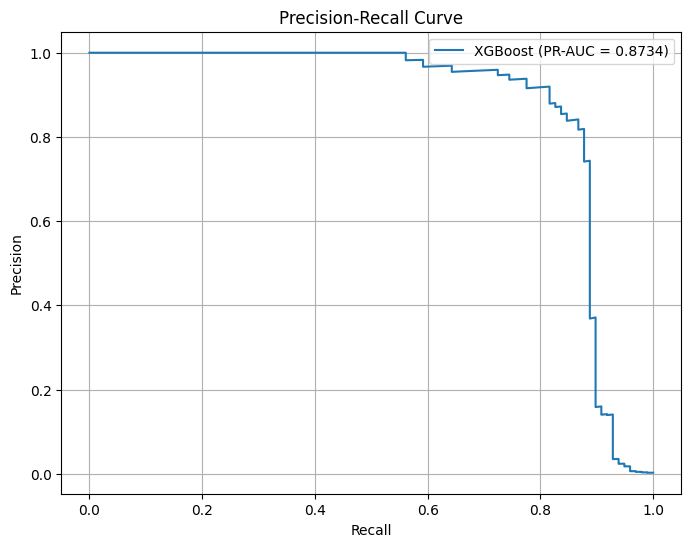

In [35]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='XGBoost (PR-AUC = {:.4f})'.format(average_precision_score(y_test, y_prob_xgb)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

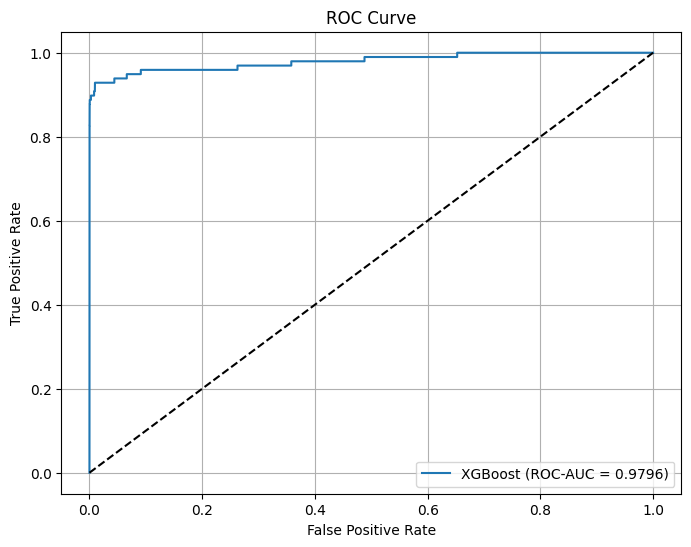

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost (ROC-AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

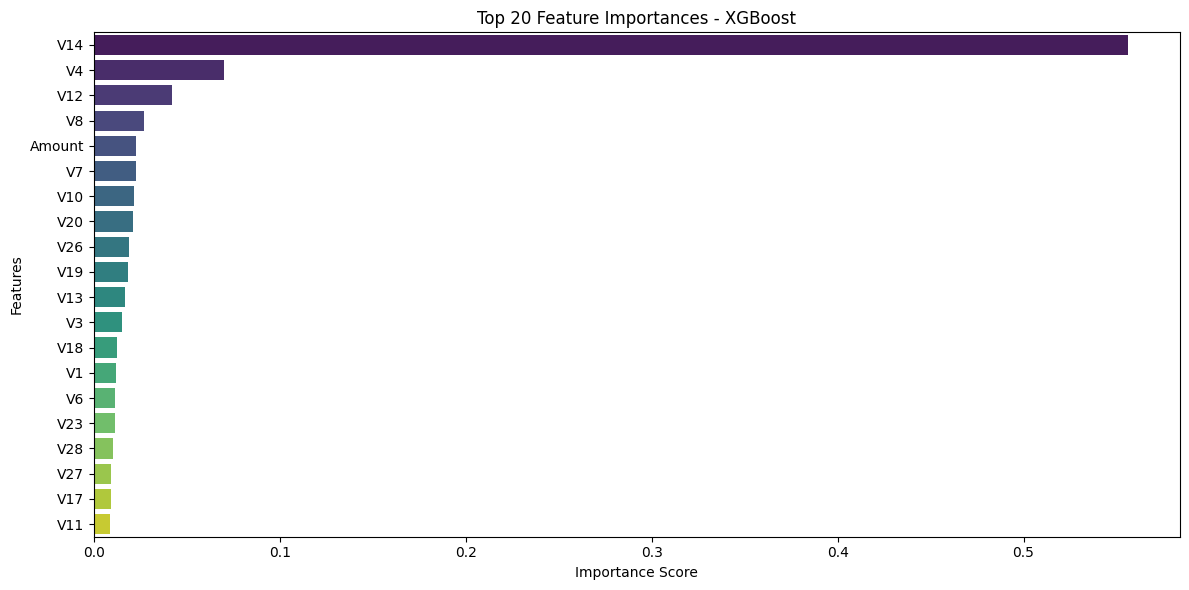

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train_scaled is a DataFrame
# If it's a NumPy array, use X.columns (original feature names) if available
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)

# Sort the importances
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_sorted.values[:20], y=feature_importances_sorted.index[:20], palette="viridis")
plt.title('Top 20 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



In [38]:
pip install shap

     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 462.1/462.1 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 2.5/2.5 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 23.2/23.2 MB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


100%|===================| 227567/227845 [09:52<00:00]        

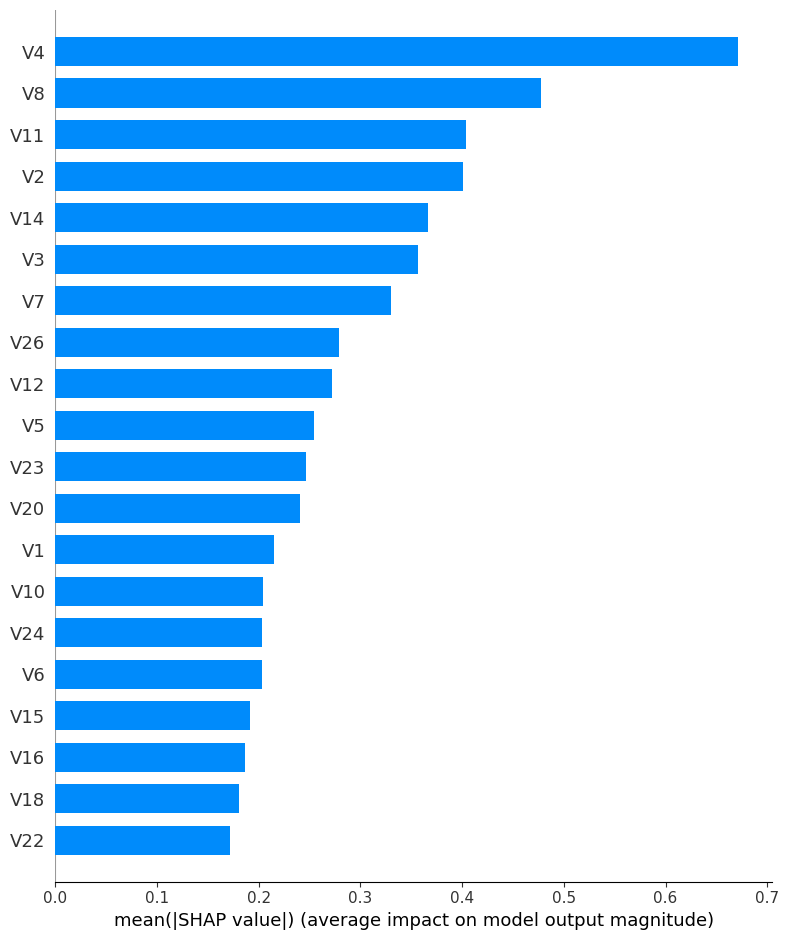

In [39]:
import shap

# Initialize the explainer with the trained XGBoost model
explainer = shap.Explainer(xgb_clf, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot summary of feature impacts
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [40]:
import joblib

In [42]:
joblib.dump(xgb_clf,'xgboost_fraud_model.pkl')

['xgboost_fraud_model.pkl']